<a href="https://colab.research.google.com/github/weeckom/V1/blob/main/Python_Notebook_Setup_by_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question # 1 : Is there an association between days of school/work missed because of health problems and highest level of education?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


In [8]:
pip install researchPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import researchpy as rp

Codebook 1: 

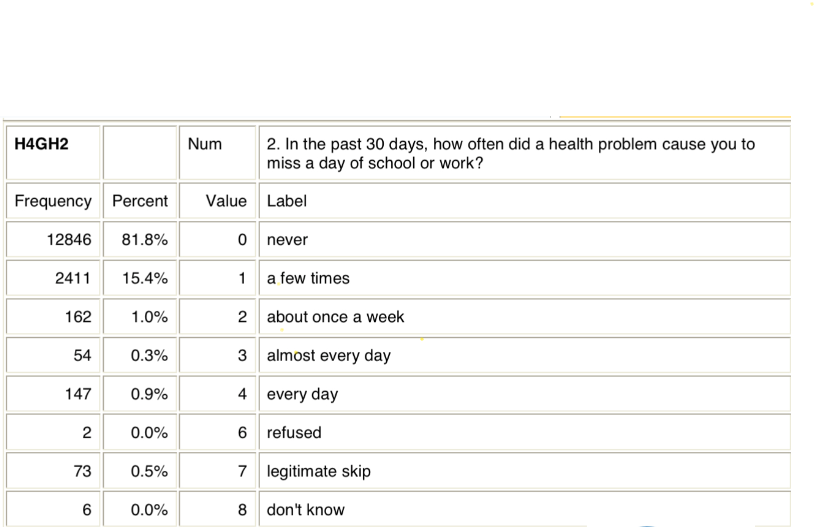

In [4]:
#Manage data for variable 1
df['Days_missed'] = df['H4GH2']
df['Days_missed'].value_counts()

0    4158
     1390
1     802
4      52
2      51
7      30
3      20
8       1
Name: Days_missed, dtype: int64

In [5]:
df['Days_missed'] = df['Days_missed'].loc[ df['Days_missed'] !=' ' ]
df['Days_missed'] = df['Days_missed'].loc[ df['Days_missed'] !='7' ]
df['Days_missed'] = df['Days_missed'].loc[ df['Days_missed'] !='8' ]
df['Days_missed'].value_counts()

0    4158
1     802
4      52
2      51
3      20
Name: Days_missed, dtype: int64

In [6]:
df['Days_missed'].replace(['0', '1', '2', '3', '4'] , ['NEVER', 'FEWTIMES', 'ONCEAWEEK', 'ALMOSTEVERYDAY', 'EVERYDAY'], inplace = True)
df['Days_missed'].value_counts()

NEVER             4158
FEWTIMES           802
EVERYDAY            52
ONCEAWEEK           51
ALMOSTEVERYDAY      20
Name: Days_missed, dtype: int64

In [10]:
rp.summary_cat(df['Days_missed'])

,Variable,Outcome,Count,Percent
0,Days_missed,NEVER,4158,81.80
1,,FEWTIMES,802,15.78
2,,EVERYDAY,52,1.02
3,,ONCEAWEEK,51,1.00
4,,ALMOSTEVERYDAY,20,0.39


<Axes: title={'center': 'In the past 30 days, how often did a health problem cause you to miss a day of school or work?'}, ylabel='Days_missed'>

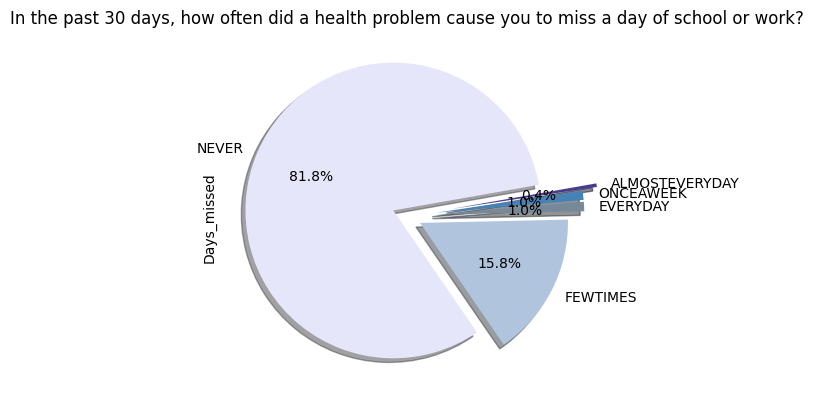

In [17]:
#Graphs and tables or statistics
plt.title("In the past 30 days, how often did a health problem cause you to miss a day of school or work?")
explode = (0.1, 0.1, 0.2, 0.2, 0.3)
df['Days_missed'].value_counts().plot(kind ='pie', autopct='%1.1f%%', explode=explode, shadow=True, startangle=10, colors=['lavender', 'lightsteelblue', 'lightslategrey','steelblue','darkslateblue'])

<Axes: title={'center': 'In the past 30 days, how often did a health problem cause you to miss a day of school or work?'}>

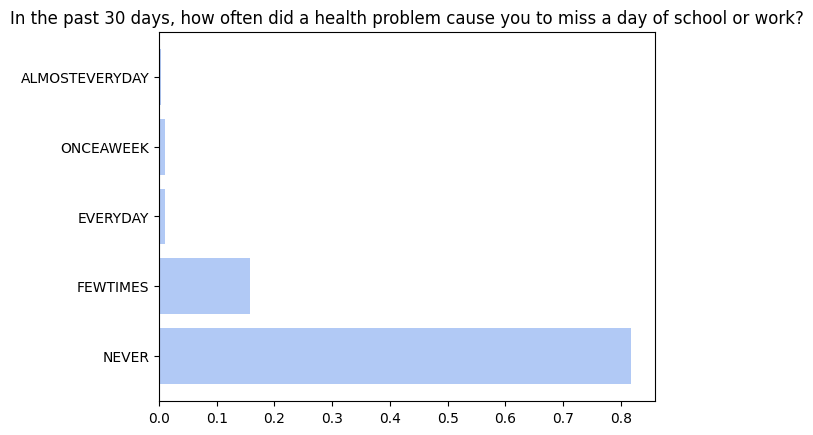

In [21]:
plt.xlabel("Days_missed")
plt.title("In the past 30 days, how often did a health problem cause you to miss a day of school or work?")
df['Days_missed'].value_counts(normalize = True).plot(kind ='barh', color = 'cornflowerblue', width = 0.8, alpha = 0.5)

Codebook 2:

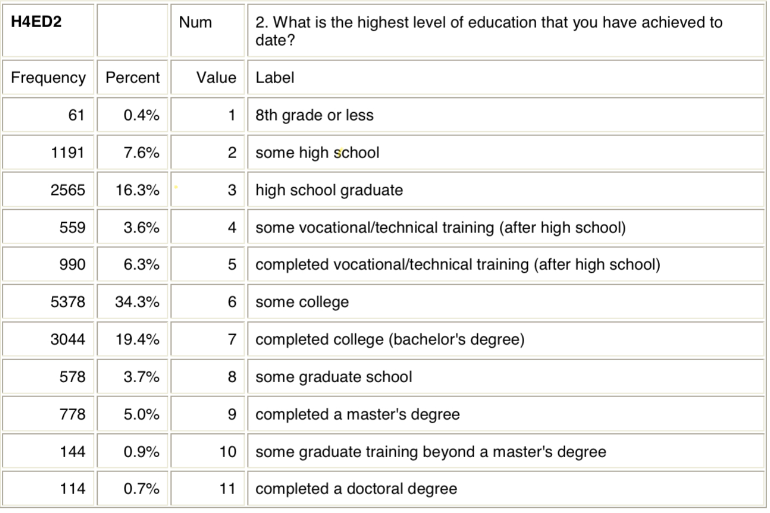

In [22]:
#Manage data for variable 1
df['Highest_education'] = df['H4ED2']
df['Highest_education'].value_counts()

6     1702
      1390
7     1012
3      835
2      383
5      327
9      256
8      199
4      182
13      72
10      59
12      39
11      31
1       16
98       1
Name: Highest_education, dtype: int64

In [23]:
df['Highest_education'] = df['Highest_education'].loc[ df['Highest_education'] !=' ' ]
df['Highest_education'] = df['Highest_education'].loc[ df['Highest_education'] !='12' ]
df['Highest_education'] = df['Highest_education'].loc[ df['Highest_education'] !='13' ]
df['Highest_education'] = df['Highest_education'].loc[ df['Highest_education'] !='98' ]
df['Highest_education'].value_counts()

6     1702
7     1012
3      835
2      383
5      327
9      256
8      199
4      182
10      59
11      31
1       16
Name: Highest_education, dtype: int64

In [25]:
df['Highest_education'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'] , ['8THGRADEORLESS', 'SOMEHIGHSCHOOL', 'HIGHSCHOOLGRADUATE', 'SOMEVOCATIONAL', 'COMPLETEDVOCATIONAL', 'SOMECOLLEGE', 'COMPLETEDCOLLEGE', 'SOMEGRADUATE', 'COMPLETEDMASTERS', 'SOMEGRADUATEAFTERMASTERS', 'COMPLETEDDOCTORAL'], inplace = True)
df['Highest_education'].value_counts()

SOMECOLLEGE                 1702
COMPLETEDCOLLEGE            1012
HIGHSCHOOLGRADUATE           835
SOMEHIGHSCHOOL               383
COMPLETEDVOCATIONAL          327
COMPLETEDMASTERS             256
SOMEGRADUATE                 199
SOMEVOCATIONAL               182
SOMEGRADUATEAFTERMASTERS      59
COMPLETEDDOCTORAL             31
8THGRADEORLESS                16
Name: Highest_education, dtype: int64

<Axes: title={'center': 'What is the highest level of education that you have achieved to date?'}, ylabel='Highest_education'>

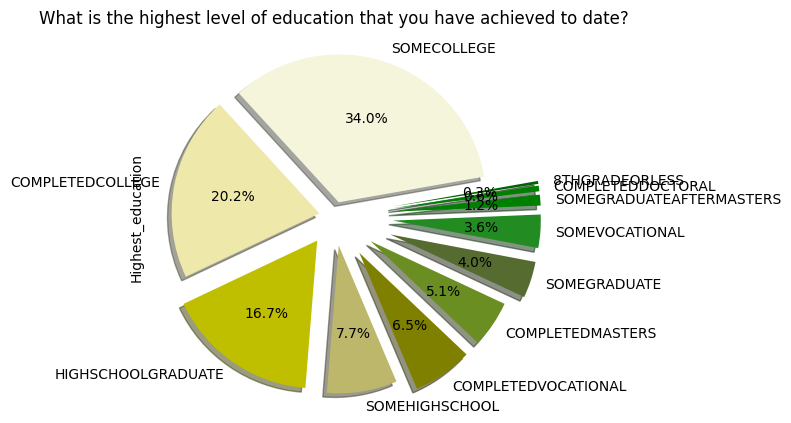

In [32]:
#Graphs and tables or statistics
plt.title("What is the highest level of education that you have achieved to date?")
explode = (0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4)
df['Highest_education'].value_counts().plot(kind ='pie', autopct='%1.1f%%', explode=explode, shadow=True, startangle=10, colors=['beige', 'palegoldenrod', 'y', 'darkkhaki', 'olive', 'olivedrab', 'darkolivegreen', 'forestgreen', 'green', 'g', 'darkgreen'])

<Axes: title={'center': 'What is the highest level of education that you have achieved to date?'}>

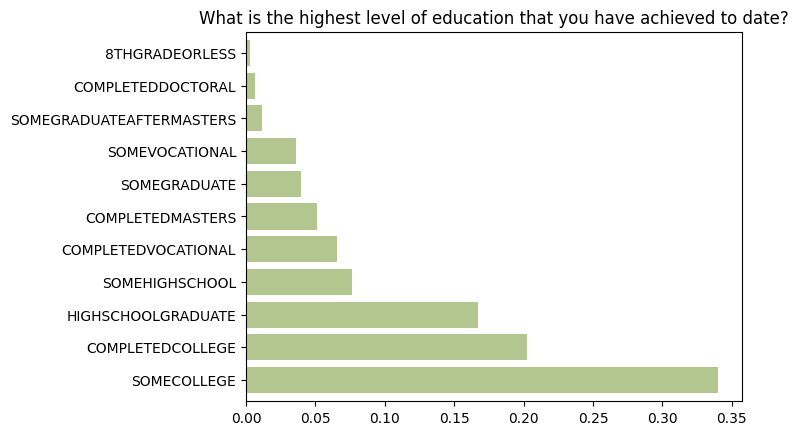

In [35]:
plt.xlabel("Highest_education")
plt.title("What is the highest level of education that you have achieved to date?")
df['Highest_education'].value_counts(normalize = True).plot(kind ='barh', color = 'olivedrab', width = 0.8, alpha = 0.5)